# Eigenvalues and eigenvectors
Eigenvalues and eigenvectors are fundamental concepts in linear algebra, 
widely used in mathematics, physics, engineering, and data science. 
Given a square matrix ${\bf A}$, an eigenvector is a non-zero vector ${\bf v}$ 
such that when ${\bf A}$ acts on ${\bf v}$, the result is a scalar multiple of ${\bf v}$:

$$
\mathbf{A} \mathbf{v} = \lambda \mathbf{v}
$$
Here, $\lambda$ is called the eigenvalue corresponding to the eigenvector $\mathbf{v}$.

In essence, eigenvectors indicate directions that remain unchanged (except for scaling) 
when a linear transformation is applied, and eigenvalues describe how much the eigenvectors 
are stretched or compressed. These concepts are crucial in understanding systems of linear 
equations, stability analysis, principal component analysis, and many other applications.

Eigenvectors represent the directions in which a linear transformation acts by stretching 
or compressing, but not rotating. In other words, when a matrix transforms space, 
its eigenvectors point along the axes that are invariant under that transformation 
(except for scaling). This means that applying the matrix to an eigenvector changes only 
its magnitude (by the eigenvalue), not its direction. Understanding eigenvectors helps 
reveal the intrinsic geometric structure of a transformation, making them essential in fields 
like data analysis, where they are used to identify principal directions of variance in datasets.

## Example 
Define the matrix 
$$
A = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$
It has eigenvalues $\lambda_1=3$ and $\lambda_2=1$.

In [61]:
import numpy as np

# Define a 2x2 matrix
A = np.array([[2, 1],
              [1, 2]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A) # Using numpy

print("Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nCondition number:")
print(np.linalg.cond(A))
print("\nEigenvectors (each column is an eigenvector):")
print(eigenvectors)

# Demonstrate the eigenvectors by showing that A @ v = lambda * v for each eigenpair
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lambda_v = eigenvalues[i] * v
    Av = A @ v
    print(f"\nEigenvector {i+1}:")
    print(v)
    print("A @ v:")
    print(Av)
    print("lambda * v:")
    print(lambda_v)
    print("Are they approximately equal?", np.allclose(Av, lambda_v))

Matrix A:
[[2 1]
 [1 2]]

Eigenvalues:
[3. 1.]

Condition number:
2.999999999999999

Eigenvectors (each column is an eigenvector):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvector 1:
[0.70710678 0.70710678]
A @ v:
[2.12132034 2.12132034]
lambda * v:
[2.12132034 2.12132034]
Are they approximately equal? True

Eigenvector 2:
[-0.70710678  0.70710678]
A @ v:
[-0.70710678  0.70710678]
lambda * v:
[-0.70710678  0.70710678]
Are they approximately equal? True


### A short note on ill-conditioned matrices.
The $A$ matrix above has condition number 
$$
\kappa(A)=\frac{|\lambda_{max}|}{|\lambda_{min}|}=\frac{3}{1}=3
$$

Let's define an ill-conditioned matrix 
$$
B = \begin{bmatrix}
1 & 1.0001 \\
1.0001 & 1
\end{bmatrix}
$$
this has the eigenvalues $\lambda_1=2.0001$ and $\lambda_2= 10^{-4}$ giving a condition number 
$$
\kappa(B)=\frac{|\lambda_{max}|}{|\lambda_{min}|}=\frac{2.0001}{10^{-4}}=20001
$$




In [62]:
# Define a 2x2 matrix
c=1.e-4
B = np.array([[1, 1+c],
              [1+c, 1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(B) # Using numpy

print("Matrix B:")
print(B)
print("\nEigenvalues:")
print(eigenvalues)
print("\nCondition number:")
print(np.linalg.cond(B))
print("\nEigenvectors (each column is an eigenvector):")
print(eigenvectors)

# Demonstrate the eigenvectors by showing that A @ v = lambda * v for each eigenpair
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lambda_v = eigenvalues[i] * v
    Bv = B @ v
    print(f"\nEigenvector {i+1}:")
    print(v)
    print("B @ v:")
    print(Bv)
    print("lambda * v:")
    print(lambda_v)
    print("Are they approximately equal?", np.allclose(Bv, lambda_v))

Matrix B:
[[1.     1.0001]
 [1.0001 1.    ]]

Eigenvalues:
[ 2.0001e+00 -1.0000e-04]

Condition number:
20000.999999988115

Eigenvectors (each column is an eigenvector):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvector 1:
[0.70710678 0.70710678]
B @ v:
[1.41428427 1.41428427]
lambda * v:
[1.41428427 1.41428427]
Are they approximately equal? True

Eigenvector 2:
[-0.70710678  0.70710678]
B @ v:
[ 7.07106781e-05 -7.07106781e-05]
lambda * v:
[ 7.07106781e-05 -7.07106781e-05]
Are they approximately equal? True


Lets now use these to solve for two right-hand sides:
$
b_1=\begin{bmatrix} 3\\3\end{bmatrix}
$
and 
$
b_2=\begin{bmatrix} 3.01\\2.99\end{bmatrix}.
$



In [59]:
b_1 = np.array([3, 3])
b_2 = np.array([3.01, 2.99])
print(f"Ax=b_1 gives {np.linalg.solve(A, b_1)}")
print(f"Ax=b_2 gives {np.linalg.solve(A, b_2)}")
print(f"Bx=b_1 gives {np.linalg.solve(B, b_1)}")
print(f"Bx=b_2 gives {np.linalg.solve(B, b_2)}")

Ax=b_1 gives [1. 1.]
Ax=b_2 gives [1.01 0.99]
Bx=b_1 gives [1.499925 1.499925]
Bx=b_2 gives [-98.500075 101.499925]


## The Power Method

The power method is an iterative algorithm used to find the largest eigenvalue 
(in absolute value) and its corresponding eigenvector of a square matrix. It is especially 
useful for large matrices where direct computation of all eigenvalues is computationally 
expensive.

The basic idea is to start with an arbitrary nonzero vector and repeatedly multiply it 
by the matrix. After each multiplication, the vector is normalized. As the process continues, 
the vector converges to the eigenvector associated with the largest eigenvalue, and the 
corresponding eigenvalue can be estimated from the ratio of successive vector norms.

The power method is simple to implement and works well when the matrix has a dominant 
eigenvalue (i.e., one that is larger in magnitude than all others). It is widely used in 
numerical linear algebra and applications such as Google's PageRank algorithm.

To estimate the dominant eigenvalue at each iteration, the power method uses the Rayleigh 
quotient:

\[
\lambda \approx \frac{\mathbf{x}^T A \mathbf{x}}{\mathbf{x}^T \mathbf{x}}
\]

At each iteration, after updating and normalizing the vector, you can compute this value to approximate the largest eigenvalue. This provides a practical way to monitor convergence and assess the accuracy of the current eigenvector estimate.

The power method can be described by the following equations:

Given a matrix $\mathbf{A}$ and an initial vector $\mathbf{x}_0$ (with $\|\mathbf{x}_0\| \neq 0$):

1. For each iteration $k$:
    - $\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k$
    - Normalize: $\mathbf{x}_{k+1} = \dfrac{\mathbf{x}_{k+1}}{\|\mathbf{x}_{k+1}\|}$
2. The approximate dominant eigenvalue after $k$ iterations:
    - $\lambda \approx \dfrac{\mathbf{x}_k^T \mathbf{A} \mathbf{x}_k}{\mathbf{x}_k^T \mathbf{x}_k}$

As $k$ increases, $\mathbf{x}_k$ converges to the eigenvector corresponding to the largest eigenvalue $\lambda$.

In [45]:
# Power iteration to find the dominant eigenvalue and eigenvector of A
# Create a random 5x5 matrix for high-dimensional example
A = np.random.rand(5, 5)
# Start with a random initial vector
x = np.random.rand(A.shape[0])
x = x / np.linalg.norm(x)

num_iterations = 10
for k in range(num_iterations): # Loop without tracking convergence
    x = A @ x
    x = x / np.linalg.norm(x)
    # Estimate the dominant eigenvalue using the Rayleigh quotient
    lambda_approx = x.T @ A @ x / (x.T @ x)
    print(f"Iteration {k+1}: Eigenvalue ≈ {lambda_approx:.6f}, Eigenvector ≈ {x}")

print("\nDominant eigenvalue (power method):", lambda_approx)
print("Dominant eigenvector (power method):", x)
# Verify the result
print("\nVerification:")
print("A @ v =", A @ x)
print("λ * v =", lambda_approx * x)
print("Diff =", A @ x - lambda_approx * x)

Iteration 1: Eigenvalue ≈ 2.820460, Eigenvector ≈ [0.22690064 0.44050555 0.49538935 0.52069022 0.48779304]
Iteration 2: Eigenvalue ≈ 2.846223, Eigenvector ≈ [0.29961046 0.41495658 0.47587631 0.56452791 0.43919767]
Iteration 3: Eigenvalue ≈ 2.852705, Eigenvector ≈ [0.30934071 0.41600094 0.48022476 0.55527039 0.43853223]
Iteration 4: Eigenvalue ≈ 2.853217, Eigenvector ≈ [0.30640366 0.41683653 0.48183162 0.55288828 0.44104074]
Iteration 5: Eigenvalue ≈ 2.852985, Eigenvector ≈ [0.30584909 0.41673763 0.48178576 0.55317719 0.44120692]
Iteration 6: Eigenvalue ≈ 2.852960, Eigenvector ≈ [0.30595663 0.41668151 0.48172977 0.55328584 0.44111026]
Iteration 7: Eigenvalue ≈ 2.852970, Eigenvector ≈ [0.30598444 0.41668096 0.48173298 0.55327541 0.44110108]
Iteration 8: Eigenvalue ≈ 2.852972, Eigenvector ≈ [0.30598052 0.41668288 0.48173617 0.55326993 0.44110536]
Iteration 9: Eigenvalue ≈ 2.852971, Eigenvector ≈ [0.30597913 0.41668287 0.48173625 0.55327015 0.44110598]
Iteration 10: Eigenvalue ≈ 2.852971, 

### Example 16 on p 130: 
Power Method for Largest Eigenvalue

Given the matrix  
$$
A = \begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6 \\
2 & 2 & 3 & 4 & 5 & 6 \\
3 & 3 & 3 & 4 & 5 & 6 \\
4 & 4 & 4 & 4 & 5 & 6 \\
5 & 5 & 5 & 5 & 5 & 6 \\
6 & 6 & 6 & 6 & 6 & 6 \\
\end{bmatrix}
$$
we use the power method to estimate its largest eigenvalue.



**Python code:**

In [47]:

A = np.array([
     [1, 2, 3, 4, 5, 6],
     [2, 2, 3, 4, 5, 6],
     [3, 3, 3, 4, 5, 6],
     [4, 4, 4, 4, 5, 6],
     [5, 5, 5, 5, 5, 6],
     [6, 6, 6, 6, 6, 6]
], dtype=float)

x = np.random.rand(A.shape[0])
x=[1, 2, 3, 4, 5, 6]
x = x / np.linalg.norm(x)

for k in range(5): # Few iterations to illustrate convergence
     x = A @ x
     x = x / np.linalg.norm(x)
     lambda_approx = x.T @ A @ x / (x.T @ x)
     print(f"Iteration {k+1}: Eigenvalue ≈ {lambda_approx:.6f} eigenvector ≈ {x}")

print("\nEstimated largest eigenvalue:", lambda_approx)
print( "with corresponding eigenvector:", x)


Iteration 1: Eigenvalue ≈ 27.645259 eigenvector ≈ [0.35923789 0.36318556 0.37502857 0.39871458 0.43819128 0.49740631]
Iteration 2: Eigenvalue ≈ 27.720892 eigenvector ≈ [0.32433295 0.33730627 0.36339546 0.40302824 0.45705997 0.5269163 ]
Iteration 3: Eigenvalue ≈ 27.722951 eigenvector ≈ [0.32999067 0.3416901  0.36555692 0.40253225 0.45404573 0.52204639]
Iteration 4: Eigenvalue ≈ 27.723007 eigenvector ≈ [0.3290655  0.34096864 0.36519694 0.4026113  0.45454546 0.52285758]
Iteration 5: Eigenvalue ≈ 27.723008 eigenvector ≈ [0.32921794 0.3410877  0.36525659 0.40259853 0.45446312 0.52272368]

Estimated largest eigenvalue: 27.723008336581927
with corresponding eigenvector: [0.32921794 0.3410877  0.36525659 0.40259853 0.45446312 0.52272368]


## The smallest eigenvalue 
of a matrix can be found using the inverse iteration method. 

$$
A^{-1}A{\bf v}= \lambda A^{-1}{\bf v} \Rightarrow \frac{1}{\lambda}{\bf v}= A^{-1}{\bf v}
$$
Hence, the smallest eigenvalue for $A$ is the largest for $A^{-1}$.

For each iteration we can solve: $ A {\bf v}= {\bf x}_k$ using any efficient war, like LU factorization. 

By applying LU factorization to the matrix, the inverse iteration becomes efficient, as the factorization only needs to be computed once. At each step, the algorithm solves for a new vector, normalizes it, and updates the eigenvalue estimate using the Rayleigh quotient. The process continues until the change in the estimated eigenvalue is below a specified tolerance. The final result is the smallest eigenvalue (computed as the reciprocal of the converged Rayleigh quotient) and its corresponding eigenvector. This approach is especially useful for large matrices where direct computation of all eigenvalues is impractical.

**Algorithm: Inverse Iteration with LU Factorization**

Let $A$ be a square matrix, $x_0$ an initial nonzero vector, and $\epsilon$ a tolerance.

1. **Input:**  
    - Matrix $A$  
    - Initial nonzero vector $x_0$  
    - Tolerance $\epsilon$

2. **LU Factorization:**  
    - Compute LU factorization of $A$: $LU = A$

3. **Initialize:**  
    - Set $k = 0$  
    - Normalize $x_0$

4. **Repeat:**  
    - Solve $Lw = x_k$  
    - Solve $Uv = w$  
    - Estimate eigenvalue: $\lambda_k = \dfrac{v^T x_k}{x_k^T x_k}$  
    - Normalize $x_{k+1} = \dfrac{v}{\|v\|}$  
    - If $|\lambda_k - \lambda_{k-1}| < \epsilon$, stop  
    - Set $x_k = x_{k+1}$, $k = k + 1$

5. **Output:**  
    - Smallest eigenvalue: $\dfrac{1}{\lambda_k}$  
    - Corresponding eigenvector: $x_k$


In [ ]:
from scipy.linalg import lu_factor, lu_solve

# Parameters
epsilon = 1e-4
xk = np.random.rand(A.shape[0])
xk = xk / np.linalg.norm(xk)
lu, piv = lu_factor(A)
lambda_prev = 0

for k in range(1000):
    # Solve Lw = xk, then Uv = w
    v = lu_solve((lu, piv), xk)
    # Rayleigh quotient for eigenvalue estimate
    lambda_k = np.dot(v, xk) / np.dot(xk, xk)
    # Normalize
    xk1 = v / np.linalg.norm(v)
    # Check convergence
    if np.abs(lambda_k - lambda_prev) < epsilon: # Convergence check
        break
    print(f"Iteration {k+1}: Eigenvalue ≈ {lambda_k:.6f}") # Track convergence
    xk = xk1
    lambda_prev = lambda_k

smallest_eigenvalue = 1 / lambda_k # Inverse iteration result
print("Smallest eigenvalue (inverse iteration with LU):", smallest_eigenvalue)
print("Corresponding eigenvector:", xk)

# Verify the result
print("\nVerification:")
print("A @ v =", A @ xk)
print("λ * v =", smallest_eigenvalue * xk)


Iteration 1: Eigenvalue ≈ -0.792657
Iteration 2: Eigenvalue ≈ -3.545168
Iteration 3: Eigenvalue ≈ -3.603169
Iteration 4: Eigenvalue ≈ -3.643099
Iteration 5: Eigenvalue ≈ -3.671379
Iteration 6: Eigenvalue ≈ -3.690830
Iteration 7: Eigenvalue ≈ -3.703904
Iteration 8: Eigenvalue ≈ -3.712553
Iteration 9: Eigenvalue ≈ -3.718214
Iteration 10: Eigenvalue ≈ -3.721895
Iteration 11: Eigenvalue ≈ -3.724276
Iteration 12: Eigenvalue ≈ -3.725813
Iteration 13: Eigenvalue ≈ -3.726802
Iteration 14: Eigenvalue ≈ -3.727439
Iteration 15: Eigenvalue ≈ -3.727848
Iteration 16: Eigenvalue ≈ -3.728111
Iteration 17: Eigenvalue ≈ -3.728279
Iteration 18: Eigenvalue ≈ -3.728388
Smallest eigenvalue (inverse iteration with LU): -0.2682074445044893
Corresponding eigenvector: [ 0.14711728 -0.40422664  0.55719565 -0.56162875  0.41071345 -0.14275133]

Verification:
A @ v = [-0.03920478  0.1079125  -0.14919686  0.15088944 -0.11065301  0.03851799]
λ * v = [-0.03945795  0.10841659 -0.14944402  0.15063301 -0.11015641  0.0382

**Task** Alter the $\epsilon$ in the cell above and check how the error improves. Can you time the iteration as function of $\epsilon$?

## Gerschgorin’s Theorem 
provides a way to estimate the location of all eigenvalues of a square matrix. It states that every eigenvalue of a complex square matrix lies within at least one of the so-called Gerschgorin discs in the complex plane.

For an $n \times n$ matrix $A = [a_{ij}]$, the Gerschgorin disc for the $i$-th row is defined as the set of all complex numbers $z$ such that:

$$
|z - a_{ii}| \leq \sum_{j \neq i} |a_{ij}|
$$

Here, $a_{ii}$ is the diagonal element of the $i$-th row, and the sum on the right is the sum of the absolute values of the non-diagonal entries in that row.

**Theorem:**  
Every eigenvalue of $A$ lies within at least one of the Gerschgorin discs.

**Implications:**  
- The theorem gives a simple way to bound the eigenvalues of a matrix using only its entries.
- If a disc is disjoint from all others, it contains exactly as many eigenvalues as its multiplicity (i.e., the number of times its center appears on the diagonal).

Gerschgorin’s Theorem is useful for quickly estimating the spectral radius and for understanding the sensitivity of eigenvalues to changes in matrix entries.

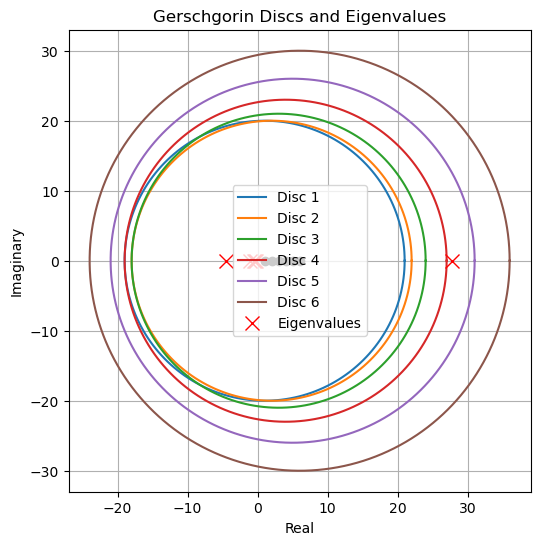

In [24]:
import matplotlib.pyplot as plt

# Compute Gerschgorin discs for matrix A
centers = np.diag(A)
radii = np.sum(np.abs(A), axis=1) - np.abs(centers)

fig, ax = plt.subplots(figsize=(6, 6))
theta = np.linspace(0, 2 * np.pi, 200)

# Plot each Gerschgorin disc
for i in range(len(centers)):
    circle_x = centers[i] + radii[i] * np.cos(theta)
    circle_y = radii[i] * np.sin(theta)
    ax.plot(circle_x, circle_y, label=f'Disc {i+1}')
    ax.plot(centers[i], 0, 'ko')  # center

# Compute and plot eigenvalues of A
eigvals = np.linalg.eigvals(A)
ax.plot(eigvals.real, eigvals.imag, 'rx', label='Eigenvalues', markersize=10)

ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title("Gerschgorin Discs and Eigenvalues")
ax.legend()
ax.grid(True)
ax.set_aspect('equal')
plt.show()

### Example on page 133. 
The matrix $B$ used in the following examples is:

$$
B = \begin{bmatrix}
3 & 0 & 1 & -1 \\
0 & 0 & 1 & 1 \\
0 & -1 & 0 & -1 \\
1 & 0 & 1 & 0 \\
\end{bmatrix}
$$

This matrix is analyzed using Gerschgorin’s theorem and various eigenvalue algorithms in the subsequent cells.

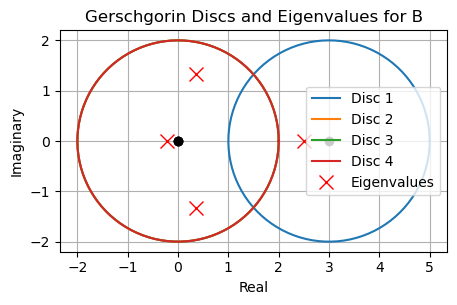

In [29]:
B = [[3, 0, 1, -1],
     [0, 0, 1, 1], 
     [0, -1, 0, -1], 
     [1, 0, 1, 0]]

B = np.array(B, dtype=float)
centers_B = np.diag(B)
radii_B = np.sum(np.abs(B), axis=1) - np.abs(centers_B)

fig, ax = plt.subplots(figsize=(5, 5))
theta = np.linspace(0, 2 * np.pi, 200)

for i in range(len(centers_B)):
    circle_x = centers_B[i] + radii_B[i] * np.cos(theta)
    circle_y = radii_B[i] * np.sin(theta)
    ax.plot(circle_x, circle_y, label=f'Disc {i+1}')
    ax.plot(centers_B[i], 0, 'ko')  # center

eigvals_B = np.linalg.eigvals(B)
ax.plot(eigvals_B.real, eigvals_B.imag, 'rx', label='Eigenvalues', markersize=10)

ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title("Gerschgorin Discs and Eigenvalues for B")
ax.legend()
ax.grid(True)
ax.set_aspect('equal')
plt.show()

## Eigenvalue Shifting




Note that if $\lambda$ is an eigenvalue of a matrix $A$ with associated eigenvector $v$, then $\lambda - \mu$ is an eigenvalue of the shifted matrix $A - \mu I$ with the same eigenvector $v$. This follows from the calculation:

$$(A - \mu I) v = Av - \mu Iv = Av - \mu v = \lambda v - \mu v = (\lambda - \mu) v$$

This property is fundamental in numerical linear algebra, especially in algorithms like the shifted inverse iteration, where shifting the matrix by $\mu I$ can help target specific eigenvalues or improve convergence. The eigenvectors remain unchanged, but the eigenvalues are translated by $-\mu$.


In [39]:
from scipy.linalg import lu_factor, lu_solve

# Shift the matrix A by mu*I and compute its eigenvalues
mu = 4.0  # example shift value
B_shifted = B - mu * np.eye(B.shape[0])

epsilon = 1e-6
xk = np.random.rand(B_shifted.shape[0])
xk = xk / np.linalg.norm(xk)
lu, piv = lu_factor(B_shifted)
lambda_prev = 0

for i in range(1000):
    v = lu_solve((lu, piv), xk)
    lambda_k = np.dot(v, xk) / np.dot(xk, xk)
    xk1 = v / np.linalg.norm(v)
    if np.abs(lambda_k - lambda_prev) < epsilon:
        break
    xk = xk1
    lambda_prev = lambda_k

smallest_eigenvalue_shifted = 1 / lambda_k
print("Smallest eigenvalue of B_shifted (inverse power method):", smallest_eigenvalue_shifted)
print("Corresponding eigenvector:", xk)
print(f"Smallest eigenvalue closest to mu={mu} of B (original):", smallest_eigenvalue_shifted + mu)
print("Verification:")
print("Residual:", B @ xk - (smallest_eigenvalue_shifted + mu) * xk)


Smallest eigenvalue of B_shifted (inverse power method): -1.4963902124429038
Corresponding eigenvector: [-0.93533551 -0.06480938  0.15101674 -0.31327492]
Smallest eigenvalue closest to mu=4.0 of B (original): 2.503609787557096
Verification:
Residual: [ 2.74656038e-07 -7.73838055e-07 -2.69261798e-06 -6.02265080e-07]


## Python routines for eigenvalues
NumPy and SciPy provide efficient routines for computing eigenvalues and eigenvectors of matrices. The `numpy.linalg` module includes the `eig` function, which computes the eigenvalues and right eigenvectors of a square array. For more advanced use cases, `scipy.linalg.eig` offers similar functionality with additional options, such as support for generalized eigenvalue problems and complex-valued matrices. Both functions return a tuple containing the eigenvalues and the corresponding eigenvectors, making them essential tools for linear algebra computations in Python.

Other useful functions include `numpy.linalg.eigh` for symmetric (or Hermitian) matrices, `numpy.linalg.svd` for singular value decomposition, and `scipy.linalg.eigvals` or `scipy.linalg.eigh` for more advanced eigenvalue computations. For sparse matrices, `scipy.sparse.linalg.eigs` and `scipy.sparse.linalg.eigsh` efficiently compute a few eigenvalues and eigenvectors. These routines are essential for large-scale problems and specialized matrix structures.

For more information, see the [NumPy `linalg` documentation](https://numpy.org/doc/stable/reference/routines.linalg.html) and the [SciPy `linalg` documentation](https://docs.scipy.org/doc/scipy/reference/linalg.html).